In [68]:
import pickle 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import defaultdict
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [33]:
def plot(fig, ax, x, y, name, baseline=None):
    # Log‐scale on x
    # Main curve
    ax.plot(x, y,
            marker='o',         # add markers at each point
            linestyle="dashed",
            linewidth=1.5,
            alpha=0.68,
            label=name)

    # Axis labels with nice font size and (La)TeX where helpful
    ax.set_xlabel(r'$\sigma_{\rm noise}$', fontsize=18)
    ax.set_ylabel('FID score', fontsize=18)

    # Ticks
    ax.tick_params(axis='both', which='major', labelsize=12)

    if baseline:
# Draw the horizontal “baseline” and annotate it
        ax.axhline(y=baseline,
                   color='black',
                   linestyle='--',
                   linewidth=1.5,
                   label=None)  # we’ll label it via text rather than legend

        # Place the text slightly above and to the right of the leftmost x
        # Adjust `x_text`/`y_text` if this overlaps your data
        x_text = x.min() * 1.2
        y_text = baseline * 1.1
        ax.text(x_text, y_text,
                rf'Noiseless score FID = {baseline:.2f}',
                color='black',
                fontsize=16,
                ha='left',    # horizontal alignment
                va='bottom',  # vertical alignment
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7)
        )

    # Optional legend for the main curve
    ax.legend(fontsize=16, loc='upper left')

    

In [37]:
def process_and_plot(paths, distr_name, title):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    ax.set_xscale('log', base=2)
    ax.set_yscale('log', base=2)

    # ax.set_title(f"FID vs. Noise Level for {title}")
    for path, name in zip(fid_paths, distribution_names):
        file_path = os.path.join(path, "fid_cache.pkl")
        with open(file_path, 'rb') as handle:
            b = pickle.load(handle)
        x = []
        y = []
        print(b)
        for k, v in b.items():
            if k != 0:
                x.append(k)
                y.append(v)

        x = np.array(x)
        srt_index = np.argsort(x)
        x = x[srt_index]
        y = np.array(y)
        y = y[srt_index]

        if abs(b.get(0, 0) - 74.1347) <0.1:
            del b[0]
            
        plot(fig, ax, x, y, name, b.get(0, None))

    fig.tight_layout()


{0.25: 16.05706787109375, 0.5: 16.123552322387695, 1.0: 16.711368560791016, 2.0: 25.310714721679688, 3.0: 61.018733978271484, 4.0: 137.83352661132812}
{0.0: 17.720600128173828, 0.25: 17.929485321044922, 0.5: 17.837596893310547, 1.0: 18.25535774230957, 2.0: 27.479759216308594, 3.0: 63.43263626098633, 4.0: 139.7415313720703}
{0.25: 16.159086227416992, 0.5: 16.198457717895508, 1.0: 16.461666107177734, 2.0: 25.902877807617188, 3.0: 61.164005279541016, 4.0: 137.11036682128906}
{0.0: 17.720600128173828, 0.25: 17.94976234436035, 0.5: 17.943607330322266, 1.0: 18.488597869873047, 2.0: 27.13142204284668, 3.0: 62.89725112915039, 4.0: 139.79244995117188}


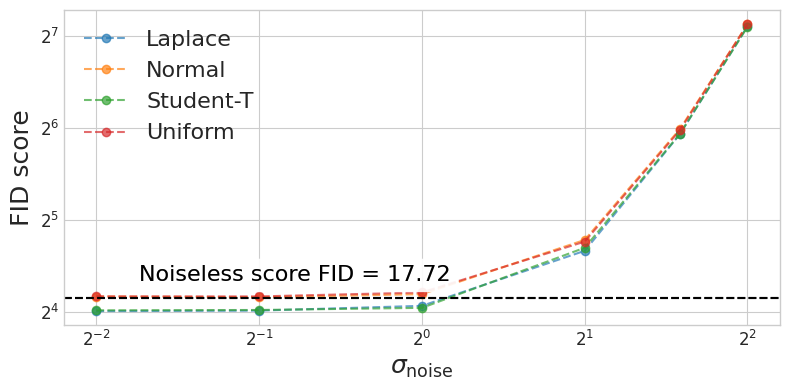

In [40]:
dataset_path = "../src/data/noisy_score_images_cifar10/"
distrib = list(filter(lambda x: ".ipynb" not in x,  os.listdir(dataset_path)))
fid_paths = [os.path.join(dataset_path, dist) for dist in distrib]
distribution_names = [{"laplace": "Laplace", "normal": "Normal", 
  "student_t": "Student-T", "uniform": "Uniform"}[dist] for dist in distrib]
process_and_plot(fid_paths, distribution_names, "CIFAR-10")
plt.savefig("cifar.pdf", bbox_inches='tight')

{0.25: 57.16836929321289, 0.5: 56.03406524658203, 1.0: 61.67626190185547, 2.0: 275.2051086425781, 3.0: 373.8587646484375, 4.0: 423.0149230957031}
{0.0: 74.134765625, 0.25: 72.97465515136719, 0.5: 72.656005859375, 1.0: 83.37246704101562, 2.0: 299.87176513671875, 4.0: 433.95233154296875, 3.0: 388.1102600097656}
{0.25: 57.44162368774414, 0.5: 54.730506896972656, 1.0: 60.05267333984375, 2.0: 276.1432189941406, 3.0: 372.2381591796875, 4.0: 422.3753662109375}
{0.0: 66.97120666503906, 0.25: 64.0137939453125, 0.5: 64.72183227539062, 1.0: 74.69917297363281, 2.0: 291.0706787109375, 3.0: 378.4800109863281, 4.0: 428.2137756347656}


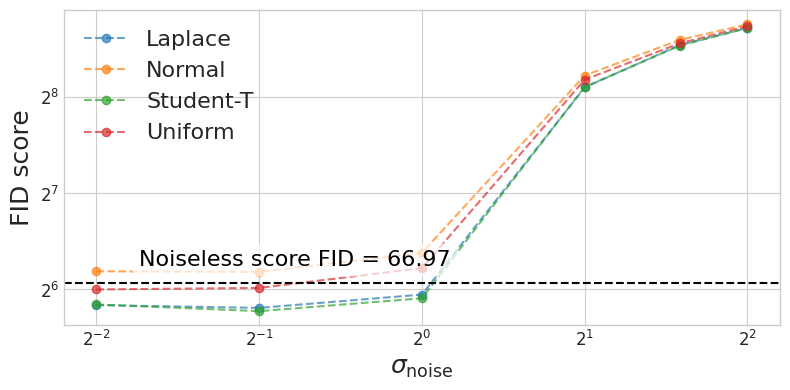

In [41]:
dataset_path = "../src/data/noisy_score_images_celebahq/"
distrib = list(filter(lambda x: ".ipynb" not in x,  os.listdir(dataset_path)))
fid_paths = [os.path.join(dataset_path, dist) for dist in distrib]
distribution_names = [{"laplace": "Laplace", "normal": "Normal", 
  "student_t": "Student-T", "uniform": "Uniform"}[dist] for dist in distrib]
process_and_plot(fid_paths, distribution_names, "CelebA-HQ")
plt.savefig("celeba.pdf", bbox_inches='tight')

In [48]:
root = "../src/data/temporal/noisy_score_images_cifar10/normal"

In [51]:
def try_int(x):
    try:
        return int(x)
    except:
        return None

In [82]:
timestamps = np.array(list(filter(lambda x: x is not None, [try_int(x) for x in os.listdir(root)])))

In [83]:
vlss = defaultdict(list)
for ts in timestamps[:]:
    with open(os.path.join(root, str(ts), "fid_cache.pkl"), "rb") as fd:
        vals = (pickle.load(fd))
        for k, v in vals.items():
            vlss[k].append(v)

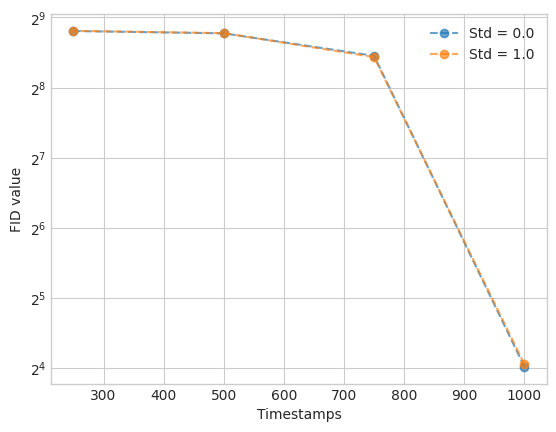

In [92]:
for k in vlss:
    values = np.array(vlss[k])
    plt.yscale("log", base=2)
    plt.plot(1000-timestamps, values, label=f"Std = {k}",
            marker='o',         # add markers at each point
            linestyle="dashed",
            linewidth=1.5,
            alpha=0.68)
    plt.xlabel("Timestamps")
    plt.ylabel("FID value")
    plt.legend()